In [1]:
import numpy as np
#This following is so that this will work with Latex, see
#http://bkanuka.com/articles/native-latex-plots/
import matplotlib as mpl
mpl.use('pgf')

In [2]:
def figsize(scale):                                 # I think scale is the size you want it on the page
    fig_width_pt = 433.62001                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0                        # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_lualatex = {                      # Setup matplotlib to use latex for output
    "pgf.texsystem": "lualatex",           # Change this if using xetex or luatex
    "text.usetex": True,                   # Use LaTeX to write all text
    #Fonts
    "font.family": "serif",                # Get from the pdf font function on the doc
    "font.serif": "Computer Modern Roman",      
    "font.sans-serif": "Computer Modern Sans serif",
    "font.monospace": [], # Blank entries should cause plots to inherit fonts from the document
    #Text size
    "font.size": 11,# Document default is 11pt font.
    #"text.fontsize": 11,
    "axes.labelsize": 11,
    "axes.formatter.useoffset": False,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    ##Axis
    #"axes.labelpad": 2,     # space between label and axis 
    "figure.figsize": figsize(1.0),     # default fig size of 1.0 textwidth
    #Packages
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}",  #need to add math or the ^ won't work
        r"\usepackage{amssymb}"]
    }

mpl.rcParams.update(pgf_with_lualatex)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import quad
from scipy.special import gamma

In [4]:
%matplotlib inline
plt.style.use('seaborn-ticks')
sns.set_palette("muted")

In [5]:
data = pd.read_csv('data/al_lw_octant_revisited.csv')
#data.to_csv('data/al_lw_octant_revisited.csv', index=False)

In [6]:
data[:]

,md,f_lw,f_lw_err
0,1,1.0097,0.0006
1,2,1.0072,0.0007
2,3,1.0089,0.0010
3,4,1.0125,0.0013
4,5,1.0087,0.0014
5,6,1.0093,0.0012
6,7,1.0093,0.0011
7,8,1.0077,0.0013


In [7]:
avg, sow = np.average(data.f_lw, weights=1/np.square(data.f_lw_err), returned=True)

In [8]:
print(avg, 1/np.sqrt(sow))

1.0089751975197043 0.00033272167171258824


In [31]:
avg

1.0089751975197043

In [19]:
data['r_det'] = np.reciprocal(data.f_lw)
data['r_det_err'] = ((data.f_lw_err/data.f_lw)*data.r_det)

In [20]:
data[:]

,md,f_lw,f_lw_err,r_det,r_det_err
0,1,1.0097,0.0006,0.990393,0.000589
1,2,1.0072,0.0007,0.992851,0.000690
2,3,1.0089,0.0010,0.991179,0.000982
3,4,1.0125,0.0013,0.987654,0.001268
4,5,1.0087,0.0014,0.991375,0.001376
5,6,1.0093,0.0012,0.990786,0.001178
6,7,1.0093,0.0011,0.990786,0.001080
7,8,1.0077,0.0013,0.992359,0.001280


In [21]:
r_avg, r_sow = np.average(data.r_det, weights=1/np.square(data.r_det_err), returned = True)
print(r_avg, 1/np.sqrt(r_sow))

0.9910993300221789 0.0003268268905288709


In [35]:
1/(1+(1-r_avg)*0.9706), (1/(1+(1-r_avg)*0.9706))*0.0017

(0.9914350026483997, 0.0016854395045022793)

In [9]:
def chi2(avg, val, err):
    v_avg = np.ones(len(val))*avg
    weights = 1/np.square(err)
    return np.sum(weights*np.square(v_avg-val))

In [10]:
chi2_val = chi2(avg, data.f_lw, data.f_lw_err)

In [11]:
np.sqrt(chi2(avg, data.f_lw, data.f_lw_err)/(len(data.f_lw)-1))*(1/np.sqrt(sow))

0.0005094184778977021

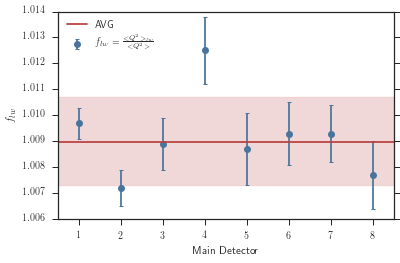

In [20]:
pp.figure(figsize=figsize(1))
pp.errorbar(data.md, 
            data.f_lw, 
            yerr=data.f_lw_err, 
            ls='None', 
            marker='o',
            capsize=2.0,
            capthick=1.0,
            color=sns.xkcd_rgb['dull blue'], 
            label='$f_{lw} = \\frac{<Q^{2}>_{lw}}{<Q^{2}>}$')
pp.plot([0.5, 8.5], [avg, avg], color=sns.xkcd_rgb['dull red'], label='AVG')
pp.fill_between([0.5, 8.5], 1.0017*np.array([avg, avg]), 0.9983*np.array([avg, avg]), color=sns.xkcd_rgb['dull red'], alpha=0.2)
pp.tick_params(top=False)
pp.legend(loc='upper left')
pp.xlim(0.5, 8.5)
pp.xlabel('Main Detector')
pp.ylabel('$f_{lw}$')
pp.savefig('plots/al_r_det_f_lw.png', bbox_inches='tight')
pp.savefig('plots/al_r_det_f_lw.pdf', bbox_inches='tight')
pp.savefig('plots/al_r_det_f_lw.pgf', bbox_inches='tight')
pp.show()

In [29]:
def chi2_prob(z, v):
    num = np.power(z, 1/(2*(v-2)))*np.exp(-z/2)
    dem = np.power(2, (v/2))*gamma(v/2)
    return num/dem

In [30]:
chi2_prob(chi2_val, len(data.f_lw)-1)

9.6190579805359969e-06

In [45]:
quad(chi2_prob, chi2_val, np.inf, len(data.f_lw)-1)

(1.945136980750072e-05, 7.88818152328092e-10)

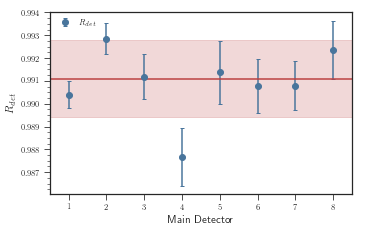

In [36]:
fig, ax = plt.subplots(figsize=figsize(0.9))
ax.errorbar(data.md, 
            data.r_det, 
            yerr=data.r_det_err, 
            ls='None', 
            marker='o',
            capsize=2.0,
            capthick=1.0,
            color=sns.xkcd_rgb['dull blue'], 
            label='$R_{det}$')
ax.plot([0.5, 8.5], [r_avg, r_avg], color=sns.xkcd_rgb['dull red'])
ax.fill_between([0.5, 8.5],
                1.0017*np.array([r_avg, r_avg]),
                0.9983*np.array([r_avg, r_avg]),
                color=sns.xkcd_rgb['dull red'],
                alpha=0.2)
ax.legend(loc='upper left')
ax.set_xlim(0.5, 8.5)
ax.set_xlabel('Main Detector')
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_ylabel('$R_{det}$')
plt.savefig('plots/al_r_det.png', bbox_inches='tight')
plt.savefig('plots/al_r_det.pdf', bbox_inches='tight')
plt.savefig('plots/al_r_det.pgf', bbox_inches='tight')
plt.show()